In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st
from PIL import Image

In [2]:
df = pd.read_csv('car_insurance.csv')
categorical_cols = ['driving_experience', 'education', 'income', 'vehicle_year' , 'vehicle_type', 'married']
df[categorical_cols] = df[categorical_cols].astype('category')

In [3]:
df['credit_score'].fillna(df['credit_score'].mean(), inplace = True)
df['annual_mileage'].fillna(df['annual_mileage'].mean(), inplace = True)

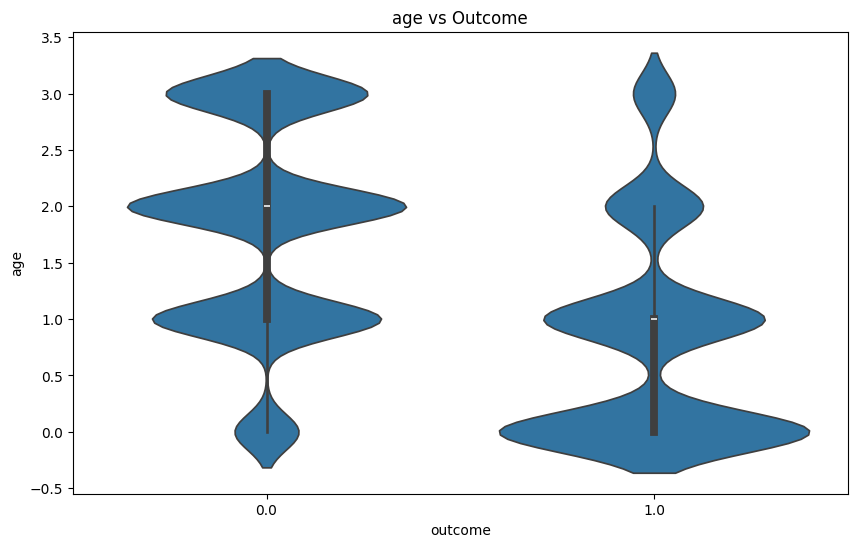

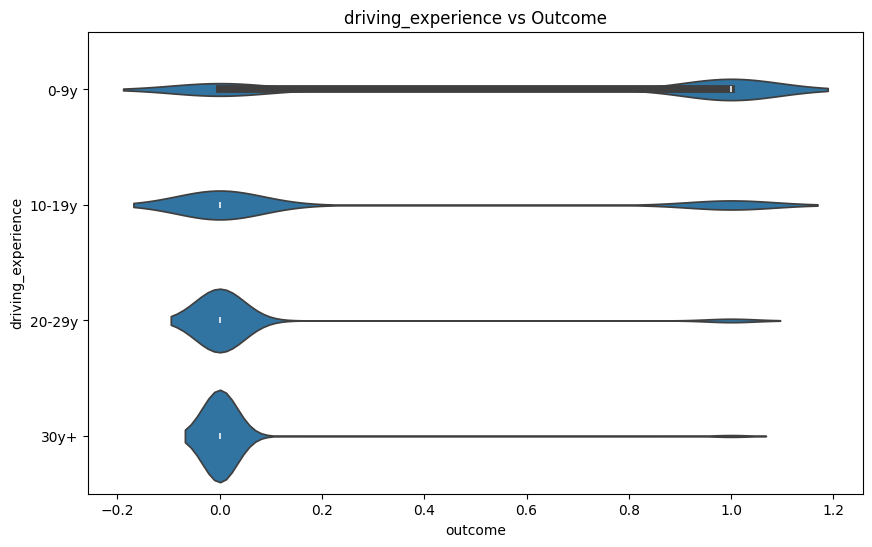

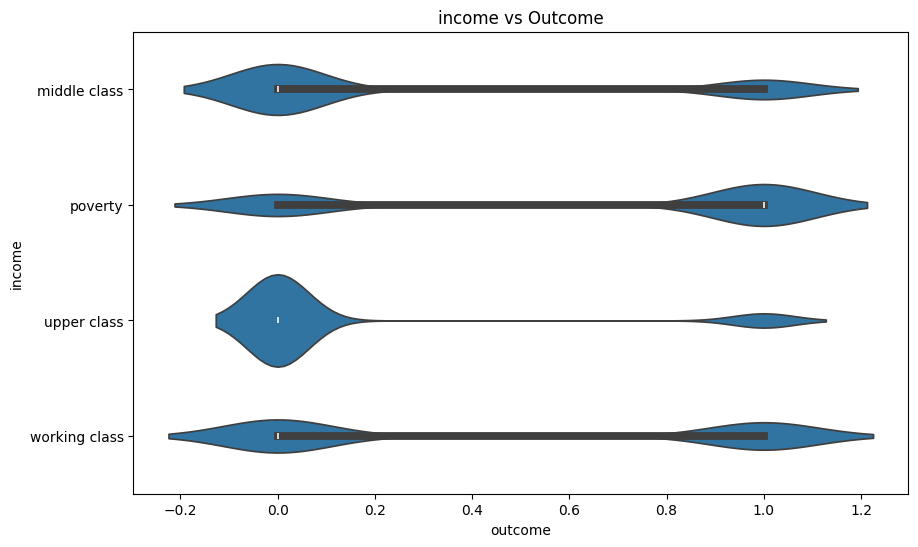

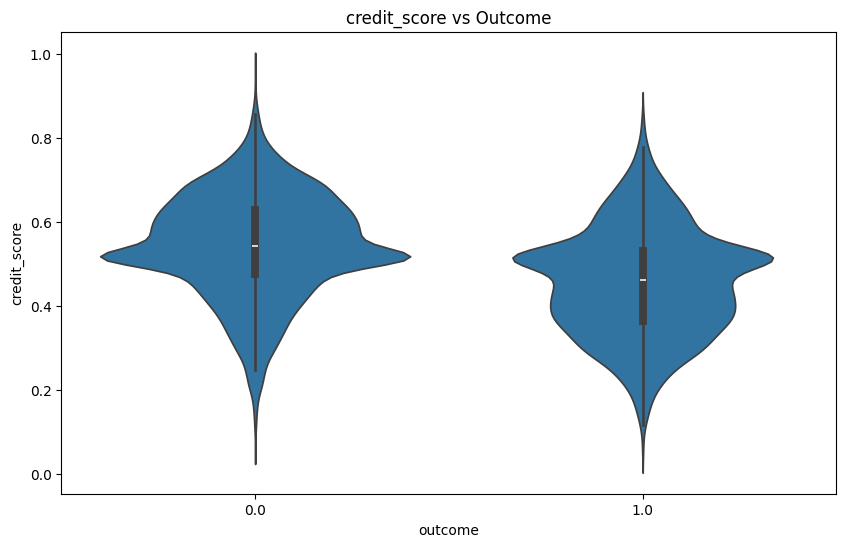

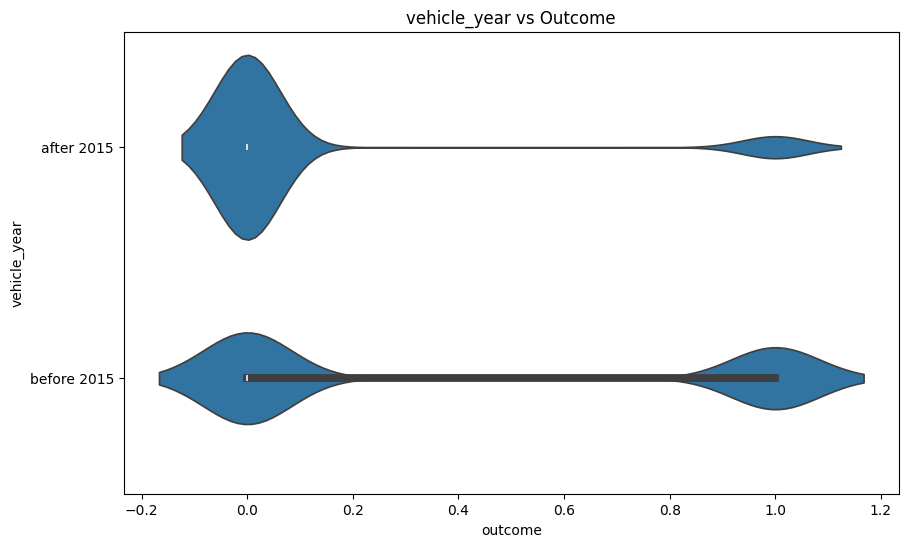

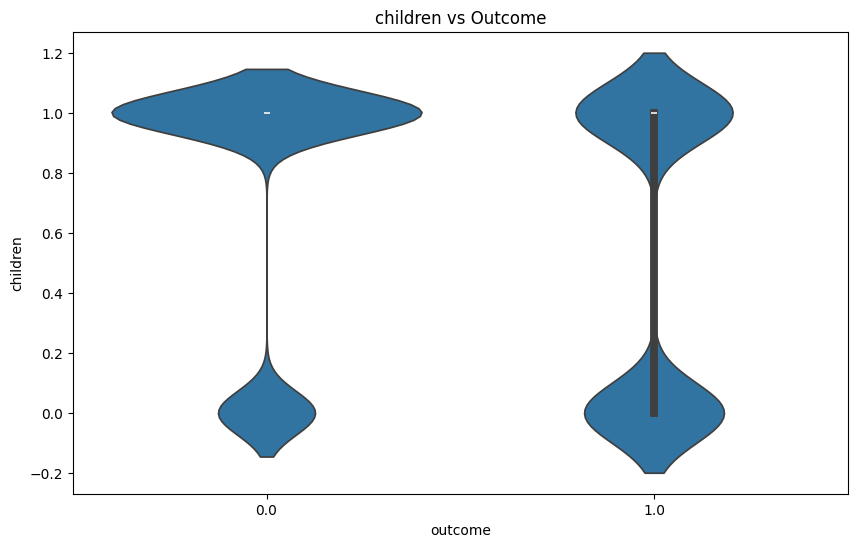

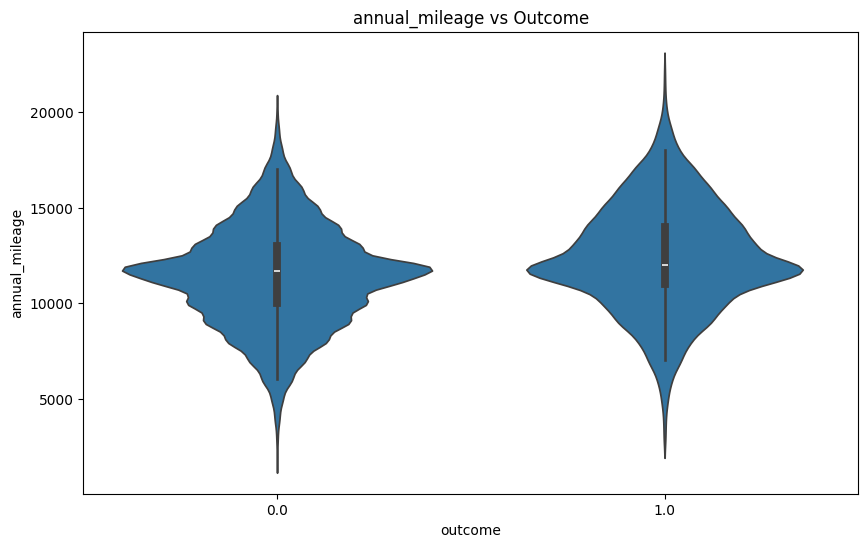

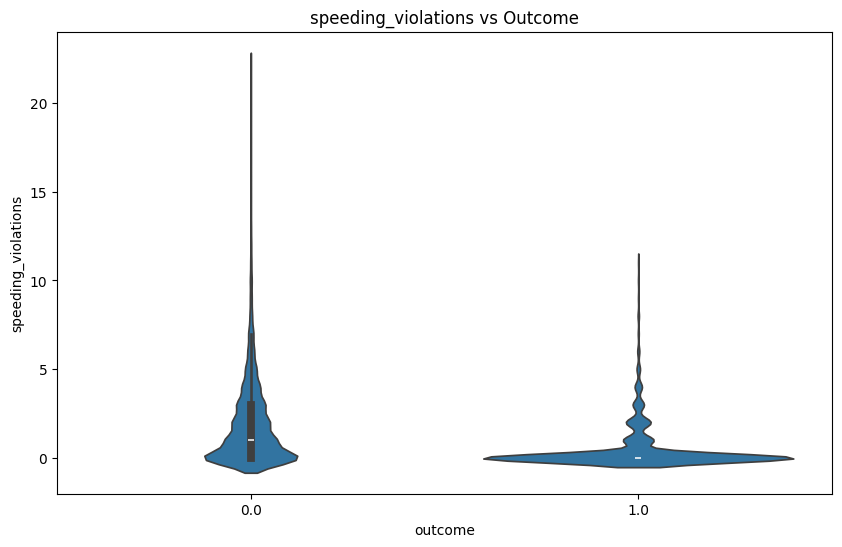

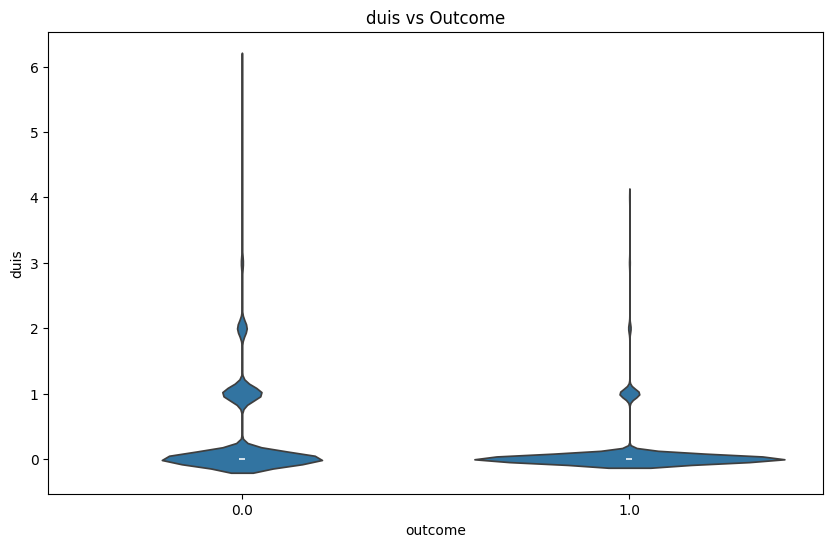

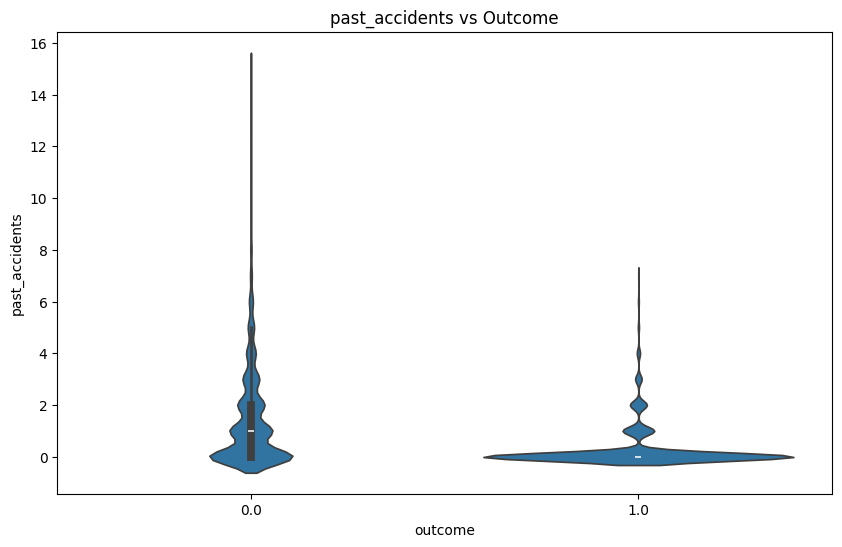

In [4]:
numerical_cols = ['age', 'driving_experience', 'income', 'credit_score', 'vehicle_year', 'children', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='outcome', y=col, data=df)
    plt.title(f'{col} vs Outcome')
    plt.show()

<Figure size 1200x1000 with 0 Axes>

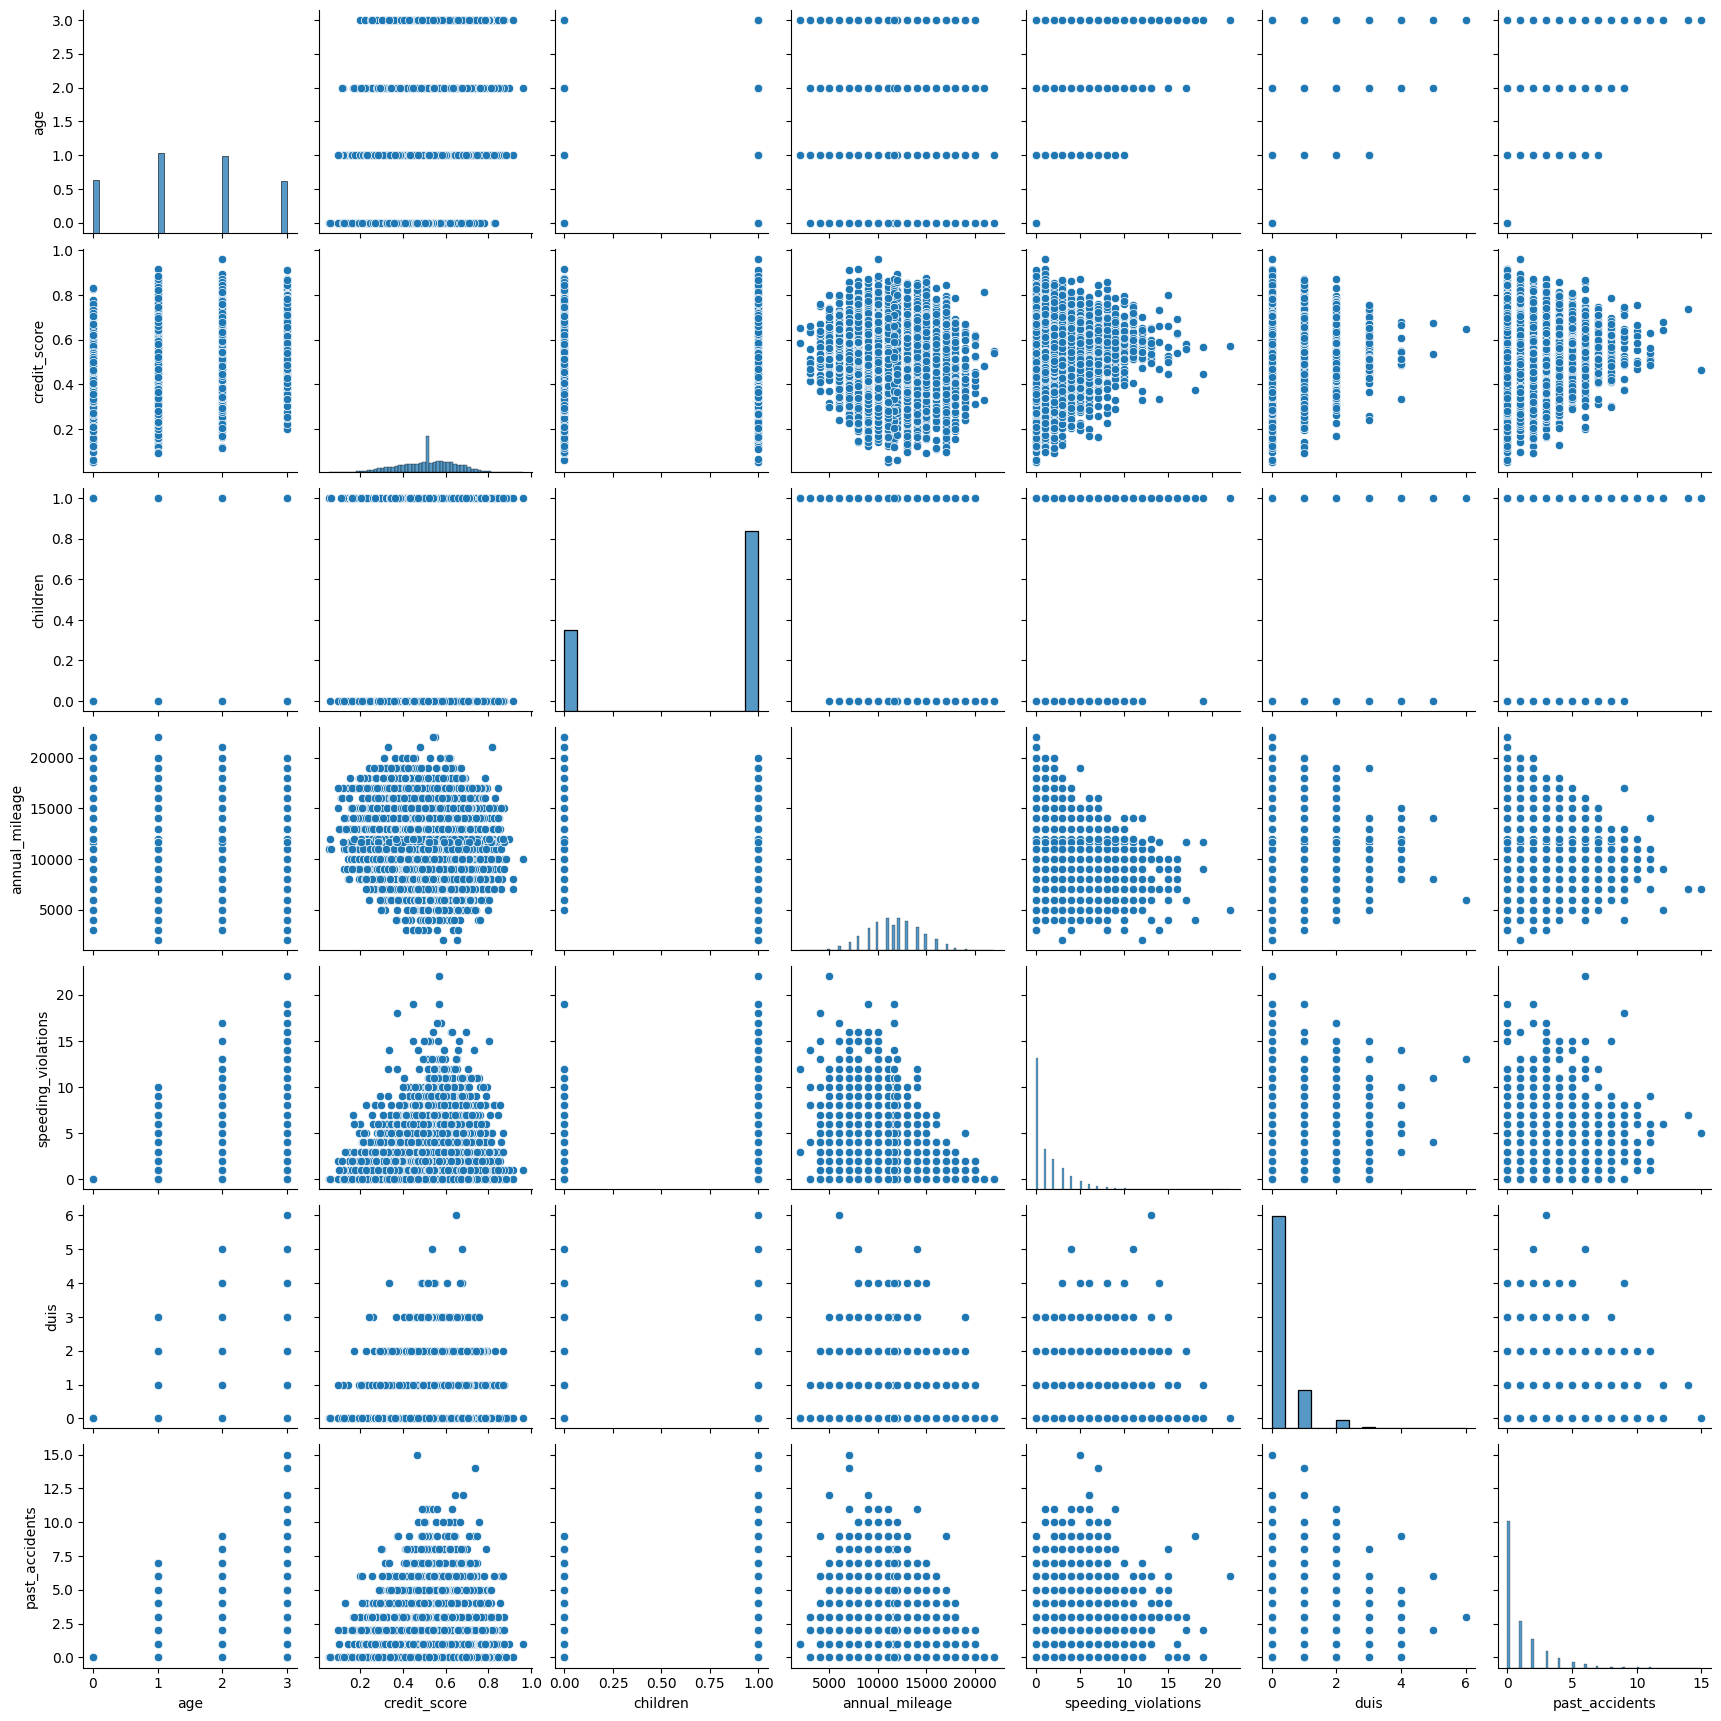

In [5]:
numerical_cols = ['age', 'driving_experience', 'income', 'credit_score', 'vehicle_year', 'children', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']

plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_cols])
plt.show()

In [6]:
df.columns

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [7]:
# Separate the features (X) and target variable (y)
X = df.drop(['outcome','id'], axis=1)
y = df['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

# # Create a list of categorical and numerical columns
# categorical_cols = X_train.select_dtypes(include=['category']).columns
# numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# # Create a ColumnTransformer to handle categorical and numerical columns separately
# ct = ColumnTransformer([
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
#     ('num', 'passthrough', numerical_cols)
# ])

# # Create a pipeline with the ColumnTransformer and RandomForestClassifier
# pipeline = Pipeline([
#     ('transformer', ct),
#     ('classifier', RandomForestClassifier())
# ])

# # Train the pipeline
# pipeline.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = pipeline.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(cm)

# # save the model for later use
# # joblib.dump(pipeline, 'insurance_prediction.pkl')

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

Accuracy: 0.8165
Confusion Matrix:
[[1235  132]
 [ 235  398]]


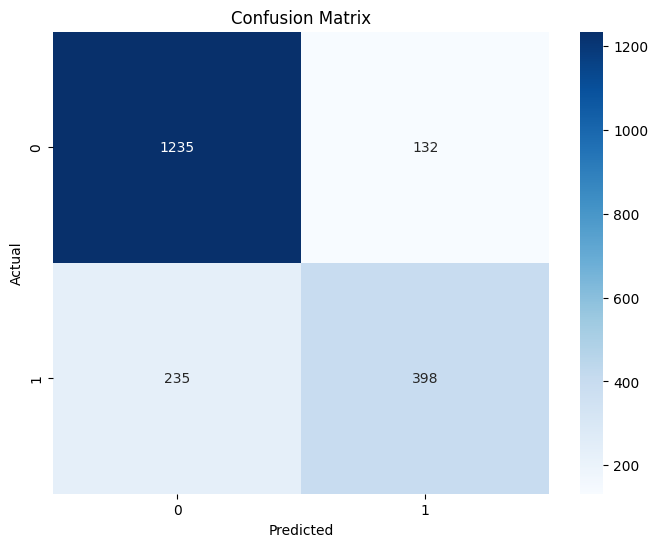

In [20]:
# Separate the features (X) and target variable (y)
X = df.drop(['outcome', 'id', 'postal_code'], axis=1)
y = df['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a list of categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a ColumnTransformer to handle categorical and numerical columns separately
ct = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numerical_cols)
])

# Create a pipeline with the ColumnTransformer and RandomForestClassifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

joblib.dump(pipeline, 'insurance_prediction.pkl')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:

# # Create a list of categorical and numerical columns
# categorical_cols = X_train.select_dtypes(include=['category']).columns
# numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# # Create a ColumnTransformer to handle categorical and numerical columns separately
# ct = ColumnTransformer([
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
#     ('num', 'passthrough', numerical_cols)
# ])

# # Create a pipeline with the ColumnTransformer and RandomForestClassifier
# pipeline = Pipeline([
#     ('transformer', ct),
#     ('classifier', RandomForestClassifier())
# ])

# # Train the pipeline
# pipeline.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = pipeline.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

In [22]:
# # Load the background image
# bg_image = Image.open("website_background.jpg")

# # Set the background image
# st.markdown(
#     f"""
#     <style>
#     .stApp {{
#         background-image: url("data:image/jpeg;base64,{bg_image.tobytes().hex()}");
#         background-size: cover;
#     }}
#     </style>
#     """,
#     unsafe_allow_html=True
# )

In [23]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Load the saved model
model = joblib.load('insurance_prediction.pkl')

# Define the function to get user input
# def get_user_input():

st.title('Insurance Outcome Prediction')

st.header('Please fill in the customer information')

st.text('The customer age is split into 4 categories:')
st.caption('0: the customer is between 17 and 25')
st.caption('1: the customer is between 26 and 35')
st.caption('2: the customer is between 36 and 45')
st.caption('3: the customer is between over 45')

age = st.number_input('Age Category:', value=0, min_value=0, max_value=3, step=1)
gender = st.number_input('Gender: 0 for female, 1 for male', value=0, min_value=0, max_value=1, step=1)
driving_experience = st.radio('Driving Experience (years)',['0-9y', '10-19y', '20-29y', '30y+'])
# exp = st.radio("driving exp",('0-9y', '10-19y', '20-29y', '30y+'))

education = st.selectbox('Education', ['high school', 'none', 'university'])
income = st.selectbox('Income', ['upper class', 'poverty', 'working class', 'middle class'])

st.text('kindly enter your credit score between 0 and 1000. the number will later be devided by 1000')
credit_score = st.slider('Credit Score:', min_value=0, max_value=1000, step=1)
vehicle_ownership = st.number_input('Vehicle Ownership: 1 for owned and 0 for borrowed', value=0, min_value=0, max_value=1, step=1)
vehicle_year = st.radio('Vehicle Year', ['after 2015', 'before 2015'])

married = st.number_input('Marital Status: 0 for single and 1 for Married', value=0, min_value=0, max_value=1, step=1)
children = st.number_input('Has Children: 0 for No and 1 for yes', value=0, min_value=0, max_value=1, step=1)
annual_mileage = st.slider('Annual Mileage', min_value=0,max_value= 80000, step=1000)
vehicle_type = st.radio('Vehicle Type', ['sedan', 'sports car'])
speeding_violations = st.slider('Speeding Violations', min_value=0, max_value = 25, step=1)
duis = st.number_input('DUIs', min_value=0, step=1)
past_accidents = st.slider('Past Accidents', min_value=0, max_value = 15,step=1)

# Create a dictionary with user input
user_data = {
    'age': age,
    'gender': gender,
    'driving_experience': driving_experience,
    'education': education,
    'income': income,
    'credit_score': credit_score/1000,
    'vehicle_ownership': vehicle_ownership,
    'vehicle_year': vehicle_year,
    'married': married,
    'children': children,
    'annual_mileage': annual_mileage,
    'vehicle_type': vehicle_type,
    'speeding_violations': speeding_violations,
    'duis': duis,
    'past_accidents': past_accidents
}


# Convert user input to a DataFrame
user_df = pd.DataFrame([user_data])

# Load the ColumnTransformer from the trained model
column_transformer = model.named_steps['transformer']

# Transform the user input data
transformed_data = column_transformer.transform(user_df)


# Display the prediction
if st.button("Predict"):
    # Make predictions
    prediction = model.named_steps['classifier'].predict(transformed_data)
    if prediction[0] == 0:
        st.write('The customer will most likely not file claims for their car')
    else:
        st.write('The customer will most likely file claims for their car')
        

st.caption(' ')

st.caption('Kindly Note that this Model is for Demostration only.')

        

Overwriting app.py


In [ ]:
!streamlit run app.py